## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.drop_duplicates()
#study_results['Mouse ID'] = study_results['Mouse ID'].drop_duplicates(keep="first")#.dropna()
#study_results
# Combine the data into a single dataset
single_dataset = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])
single_dataset 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
single_dataset['Mouse ID'].drop_duplicates(keep="first").count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

single_dataset1 = single_dataset.drop_duplicates(subset=['Mouse ID','Timepoint'])
single_dataset1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
good_dataset = pd.DataFrame(single_dataset1)
good_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
#good_dataset['Mouse ID'].drop_duplicates(keep="first").count()
#single_dataset1['Mouse ID'].count()

## Summary Statistics

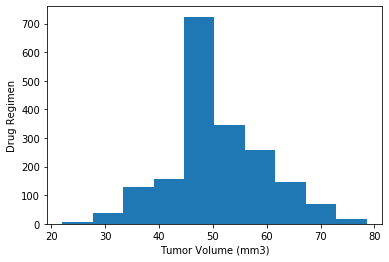

mean: 50.449276454131365
median: 48.951421075
mode: 0    45.0
dtype: float64


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
plt.hist(good_dataset['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Drug Regimen')
plt.show()
mean = good_dataset['Tumor Volume (mm3)'].mean()
median = good_dataset['Tumor Volume (mm3)'].median()
mode = good_dataset['Tumor Volume (mm3)'].mode()
print(f'mean: {mean}')
print(f'median: {median}')
print(f'mode: {mode}')
# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
good_dataset1 = good_dataset.groupby(['Drug Regimen'])

round(good_dataset1['Tumor Volume (mm3)'].describe(),2)

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.68,4.99,23.34,37.69,41.56,45.00,48.16
Ceftamin,178.0,52.59,6.27,45.00,47.21,51.78,56.80,68.92
Infubinol,178.0,52.88,6.57,36.32,47.31,51.82,57.31,72.23
Ketapril,188.0,55.24,8.28,45.00,48.23,53.70,60.87,78.57
Naftisol,186.0,54.33,8.13,45.00,47.29,52.51,59.96,76.67
Placebo,181.0,54.03,7.82,45.00,47.46,52.29,59.92,73.21
Propriva,156.0,52.39,6.57,45.00,47.05,50.91,56.49,72.46
Ramicane,228.0,40.22,4.85,22.05,36.67,40.67,45.00,47.62
Stelasyn,181.0,54.23,7.71,45.00,48.05,52.43,58.72,75.12


## Bar Plots

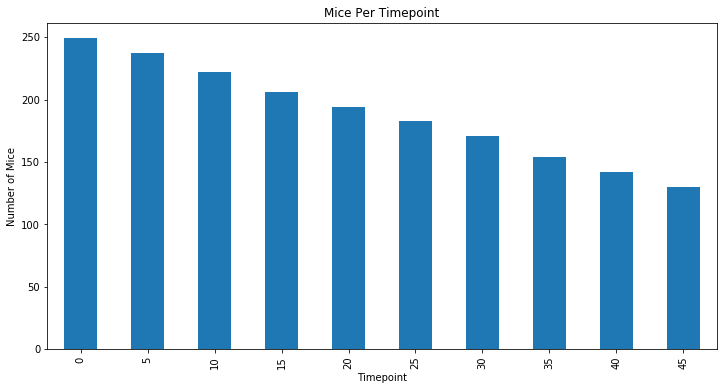

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
 # Filter the DataFrame down only to those columns to chart
good_dataset1 = pd.DataFrame(good_dataset)
good_dataset2 = good_dataset1.groupby(['Timepoint'])
good_dataset2 = good_dataset2['Mouse ID'].count()

good_dataset2.plot(kind="bar", figsize=(12,6))

plt.title("Mice Per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")
plt.show()



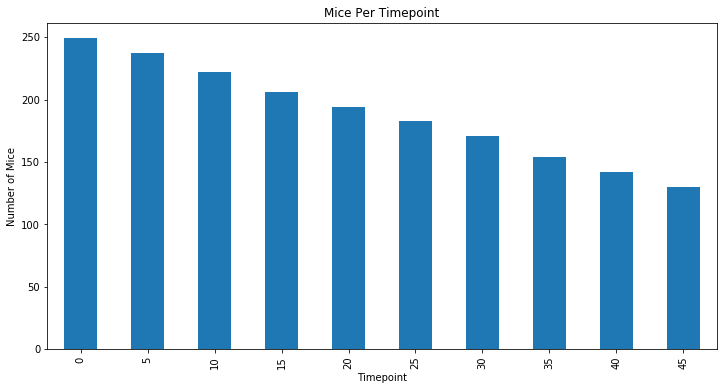

In [10]:
# Generate a bar plot showing the number of 
# #mice per time point for each treatment throughout the course of the study using pyplot. I cant picture that breakdown.
good_dataset1 = pd.DataFrame(good_dataset)
good_dataset2 = good_dataset1.groupby(['Timepoint'])
good_dataset2 = good_dataset2['Mouse ID'].count()

good_dataset2.plot(kind="bar", figsize=(12,6))

plt.title("Mice Per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")
plt.show()

## Pie Plots

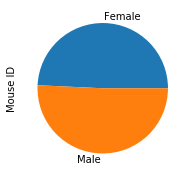

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
good_dataset4 = pd.DataFrame(good_dataset)
good_dataset5 = good_dataset4.groupby(['Sex'])
good_dataset5 = good_dataset5['Mouse ID'].count()
#good_dataset5
good_dataset5.plot(kind="pie", figsize=(20,3))


plt.show()


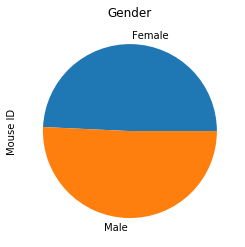

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Cannot find the difference between pandas and pyplot anywhere in the class exercises
good_dataset5.plot(kind="pie", title="Gender")
plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
good_dataset5 = pd.DataFrame(good_dataset)
good_dataset6 = good_dataset5.groupby(['Drug Regimen'])
good_dataset6 = good_dataset6.max()
tumor_series = good_dataset6['Tumor Volume (mm3)']

In [26]:
quartiles = tumor_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The IQR is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("Yes there are two outliers")

The lower quartile is: 69.74907115250001
The upper quartile is: 74.6738752325
The IQR is: 4.924804079999987
The median is: 72.834179835 
Values below 62.36186503250003 could be outliers.
Values above 82.06108135249997 could be outliers.
Yes there are two outliers


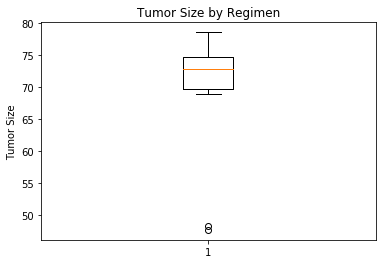

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

good_dataset6.nsmallest(4, 'Tumor Volume (mm3)')


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Size by Regimen')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(tumor_series)
plt.show()

## Line and Scatter Plots

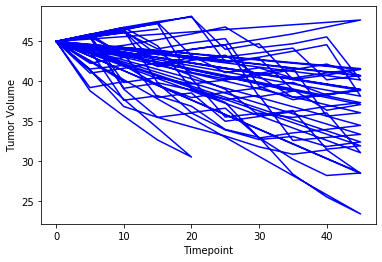

In [28]:
# Generate a line plot of TIME point versus TUMOR volume for a mouse treated with Capomulin
good_dataset_cap = good_dataset.loc[(good_dataset['Drug Regimen']) == "Capomulin"]
t = good_dataset_cap['Timepoint']
u = good_dataset_cap['Tumor Volume (mm3)']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
something, = plt.plot(t, u, color="blue", label="Time vs Tumor" )

plt.show()


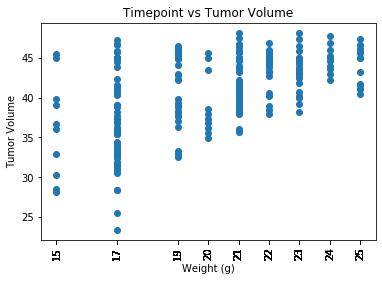

In [29]:
# Generate a scatter plot of MOUSE WEIGHT versus AVERAGE TUMOR VOLUME for the Capomulin regimen. No avg works yet
good_dataset_cap = good_dataset.loc[(good_dataset['Drug Regimen']) == "Capomulin"]

x = good_dataset_cap['Weight (g)']

y = good_dataset_cap['Tumor Volume (mm3)']#.mean()
plt.scatter(x,y)
plt.xticks(x, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
plt.title("Timepoint vs Tumor Volume")
#good_dataset_cap
plt.show()



## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient {round(st.pearsonr(x,y)[0],2)}")

The correlation coefficient 0.53


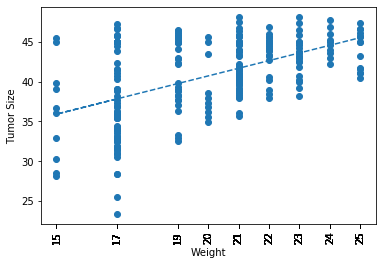

In [31]:
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x, y)
vc_fit = vc_slope * x + vc_int

# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
plt.scatter(x,y)
plt.plot(x,vc_fit,"--")
plt.xticks(x, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Tumor Size')
plt.show()